# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, mean_absolute_error, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from math import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import pickle

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA


def custom_mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2 * ((abs(3.97 - y)/(0.337342))**2 + 1))/y.shape[0]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_train = pd.read_csv('./drive/My Drive/ML Project/data/data_train.csv', na_values='.')
print(data_train.head())
data_test = pd.read_csv('./drive/My Drive/ML Project/data/data_test.csv', na_values='.')
print(data_test.head())
data_train = shuffle(data_train, random_state = 5929)

                                               title  ... genre: Romance
0  \nQ-Ko-Chan 1: The Earth Invader Girl (Q-Ko-Ch...  ...              0
1                    \nFables, Vol. 2: Animal Farm\n  ...              0
2                  \nMemorial Day (Mitch Rapp, #7)\n  ...              0
3              \nThe Diving Bell and the Butterfly\n  ...              0
4   \nScience Ink: Tattoos of the Science Obsessed\n  ...              0

[5 rows x 35 columns]
                                               title  ... genre: Romance
0                      \nInsurgent (Divergent, #2)\n  ...              1
1                              \nPearl in the Mist\n  ...              1
2  \nThe Homemade Flour Cookbook: The Home Cook's...  ...              0
3       \nTwisted Twenty-Six (Stephanie Plum, #26)\n  ...              1
4  \nHot, Flat, and Crowded: Why We Need a Green ...  ...              0

[5 rows x 35 columns]


In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
y = data_train.values[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(mean_squared_error(np.array([3.967898] * y_train.shape[0]), y_train))
print(mean_squared_error(np.array([3.967898] * y_test.shape[0]), y_test))
print(custom_mean_squared_error(np.array([3.967898] * y_test.shape[0]), y_test))

count = 0
for row in X:
    if np.nan in row:
        count += 1
print(count)

# Linear Regression

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
print(X.shape)

kfold = KFold(n_splits=5)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    print('mse', round(mean_squared_error(y_hat, y_test), 3), 'training', round(mean_squared_error(clf.predict(X_train), y_train), 3))

model = LinearRegression()
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegression.sav', 'wb'))

(16206, 20)
mse 0.108 training 0.101
mse 0.103 training 0.103
mse 0.1 training 0.103
mse 0.107 training 0.102
mse 0.098 training 0.104


In [ ]:
model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegression.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

0.10265793892985837


Linear regression with standardisation


In [ ]:
# X = np.ndarray((data.values.shape[0], data.values[:, 10:-6].shape[1] + data.values[:, -3:].shape[1]))
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)
# standardising data
scaler = StandardScaler()
X = scaler.fit_transform(X)
kfold = KFold(n_splits=5)
train = 0
test = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    train += mean_squared_error(clf.predict(X_train), y_train)
    test += mean_squared_error(y_hat, y_test)

print("Train:",train/5)
print("Test:",test/5)
    # print(clf.coef_[-1])

model = LinearRegression()
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegressionWithStandardisation.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegressionWithStandardisation.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

Train: 0.10261438805216638
Test: 0.10305194239799495
0.10265793892985837


Linear regression with log of author followers

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
indexes = [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

X[:, 3] = np.log(X[:, 3] + 1)


coeff = [0] * len(X[0])
kfold = KFold(n_splits=5)
fold = 1
intercept = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print('Fold', fold)
    fold = fold + 1
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    coeff = coeff + clf.coef_
    cur_coeff = clf.coef_
    intercept += (clf.intercept_)
    cur_coeff_index = []
    for i in range(len(cur_coeff)):
        cur_coeff_index.append((cur_coeff[i], i))
    cur_coeff_index.sort(reverse=True)
    for i in range(5):
        idx = cur_coeff_index[i][1]
        # print(data.columns[indexes[idx]])
    y_hat = clf.predict(X_test)
    print('mse', round(mean_squared_error(y_hat, y_test), 3), 'training', round(mean_squared_error(clf.predict(X_train), y_train), 3))


print('Intercept', intercept/5)
coeff = coeff / 5
coeff_index = []
for i in range(len(coeff)):
    coeff_index.append((coeff[i], i))
coeff_index.sort(reverse=True)
for idx in coeff_index:
    print(data_train.columns[indexes[idx[1]]])


model = LinearRegression()
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegressionWithLogOfAuthorFollowers.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegressionWithLogOfAuthorFollowers.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

Fold 1
mse 0.1 training 0.094
Fold 2
mse 0.096 training 0.096
Fold 3
mse 0.093 training 0.096
Fold 4
mse 0.099 training 0.095
Fold 5
mse 0.093 training 0.096
Intercept 3.5990353064666807
genre: Audiobook
genre: Young Adult
authorFollowers
genre: Fiction
genre: Romance
genre: Mystery
noOfPages
yearPublished
genre: Fantasy
genre: Paranormal
genre: Thriller
genre: Nonfiction
language
genre: Contemporary
genre: Childrens
genre: Adult
genre: Literature
genre: Sequential Art
genre: Science Fiction
genre: Historical
0.0956042588228584


Linear regression with polynomial features
 * Degree 1
 * Degree 2
 * Degree 3

In [ ]:
# Linear regression with polynomial features

#Getting the data in X, Y
for deg in range(1, 4):
  print('Degree:', deg)
  X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
  Y = data_train.values[:,6]
  metric = 0
#   Y = data.values[:,-5].astype('float64') ## Rating count
#   Y = np.log(Y)

  #take log of author followers
  X[:, 3] = np.log(X[:, 3] + 1)
  #Add a new column corresponding to each the second degree of each of the featuers.
  trans = PolynomialFeatures(degree=deg)
  X = trans.fit_transform(X)

  #K fold cross validation
  kfold = KFold(n_splits=5)
  fold_number = 1
  train_avg = 0
  test_avg = 0
  coeff = [0] * len(X[0])
  coeff = np.array(coeff)
  for train_index, test_index in kfold.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]
      
      clf = LinearRegression()
      clf.fit(X_train, y_train)
      coeff = coeff + clf.coef_
      y_hat = clf.predict(X_test)
      test_avg += mean_squared_error(y_hat, y_test)
      metric += custom_mean_squared_error(y_hat, y_test)
      y_hat = clf.predict(X_train)
      train_avg += mean_squared_error(y_hat, y_train)
  print(train_avg/5)
  print(test_avg/5)
  print(metric/5)
  model = LinearRegression()
  model.fit(X, Y)
  pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegressionDegree' + str(deg) + '.sav', 'wb'))
  model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegressionDegree' + str(deg) + '.sav', 'rb'))
  y_hat = model.predict(X)
  print(mean_squared_error(y_hat, Y))

Degree: 1
0.09556331263509951
0.09597405404615773
0.750642756751252
0.0956042588228584
Degree: 2
0.08446446245474666
0.08790420518142056
0.6732087527735165
0.08479733084846475
Degree: 3
0.07069450146917368
0.20761788740544032
0.9760240370823817
0.07243549782186118


Linear regression with polynomial features and PCA

In [ ]:
# Linear regression with polynomial features + PCA

#Getting the data in X, Y
for deg in range(1, 3):
  print('Degree:', deg)
  X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
  Y = data_train.values[:,6]
#   Y = data.values[:,-5].astype('float64') ## Rating count
#   Y = np.log(Y)



  #take log of author followers
  X[:, 3] = np.log(X[:, 3] + 1)
  #Add a new column corresponding to each the second degree of each of the featuers.
  trans = PolynomialFeatures(degree=deg)
  X = trans.fit_transform(X)

  #K fold cross validation
  kfold = KFold(n_splits=5)
  fold_number = 1
  train_avg = 0
  test_avg = 0
  for train_index, test_index in kfold.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]

    #   scaler = StandardScaler()
    #   scaler.fit(X_train)
    #   X_train = scaler.transform(X_train)
    #   X_test = scaler.transform(X_test)
      pca = PCA(0.95)
      pca.fit(X_train)
      X_train = pca.transform(X_train)
      X_test = pca.transform(X_test)
      
      clf = LinearRegression()
      clf.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      test_avg += mean_squared_error(y_hat, y_test)
      y_hat = clf.predict(X_train)
      train_avg += mean_squared_error(y_hat, y_train)
  print(train_avg/5)
  print(test_avg/5)
  
  pca = PCA(0.95)
  pca.fit(X)
  X = pca.transform(X)

  model = LinearRegression()
  model.fit(X, Y)
  pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegressionDegreePCA' + str(deg) + '.sav', 'wb'))
  model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegressionDegreePCA' + str(deg) + '.sav', 'rb'))
  y_hat = model.predict(X)
  print(mean_squared_error(y_hat, Y))

Degree: 1
0.11332541548465411
0.11333942966244444
0.11332684626709716
Degree: 2
0.11325955119315692
0.11354225036481094
0.11327359147017013


Linear Regression on Polynomial features with Ridge Regularization

In [ ]:
print("Ridge regression with polynomial features")

#Getting the data in X, Y
for deg in range(3, 4):
  print('Degree:', deg)
  X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
  Y = data_train.values[:,6]
  metric = 0
#   Y = data.values[:,-5].astype('float64') ## Rating count
#   Y = np.log(Y)

  #take log of author followers
  X[:, 3] = np.log(X[:, 3] + 1)
  #Add a new column corresponding to each the second degree of each of the featuers.
  trans = PolynomialFeatures(degree=deg)
  X = trans.fit_transform(X)

  #K fold cross validation
  kfold = KFold(n_splits=5)
  fold_number = 1
  train_avg = 0
  test_avg = 0
  for train_index, test_index in kfold.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]
      clf = Ridge(normalize = True)
      clf.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      test_avg += mean_squared_error(y_hat, y_test)
      y_hat = clf.predict(X_train)
      train_avg += mean_squared_error(y_hat, y_train)
      metric += custom_mean_squared_error(y_hat, y_train)
  print(train_avg/5)
  print(test_avg/5)
  print(metric/5)

  model = Ridge(normalize = True)
  model.fit(X, Y)
  pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegressionDegreeRidge' + str(deg) + '.sav', 'wb'))
  model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegressionDegreeRidge' + str(deg) + '.sav', 'rb'))
  y_hat = model.predict(X)
  print(mean_squared_error(y_hat, Y))

Ridge regression with polynomial features
Degree: 3
0.08767782899160521
0.09107147952587052
0.7166335155137022
0.08810916583383871


Linear Regression on polynomial features with Lasso Regularisation

In [ ]:
print("Lasso regression with polynomial features")

#Getting the data in X, Y
for deg in range(3, 4):
  print('Degree:', deg)
  metric = 0
  X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
  Y = data_train.values[:,6]
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
#   Y = data.values[:,-5].astype('float64') ## Rating count
#   Y = np.log(Y)

  #take log of author followers
  X[:, 3] = np.log(X[:, 3] + 1)
  #Add a new column corresponding to each the second degree of each of the featuers.
  trans = PolynomialFeatures(degree=deg)
  X = trans.fit_transform(X)

  #K fold cross validation
  kfold = KFold(n_splits=5)
  fold_number = 1
  train_avg = 0
  test_avg = 0
  for train_index, test_index in kfold.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]
      clf = Lasso(max_iter = 10000, tol=0.001)
      clf.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      metric += custom_mean_squared_error(y_hat, y_test)
      test_avg += mean_squared_error(y_hat, y_test)
      y_hat = clf.predict(X_train)
      train_avg += mean_squared_error(y_hat, y_train)
  print(train_avg/5)
  print(test_avg/5)
  print(metric/5)

  model = Lasso(max_iter = 10000, tol=0.001)
  model.fit(X, Y)
  pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegressionDegreeLasso' + str(deg) + '.sav', 'wb'))
  model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegressionDegreeLasso' + str(deg) + '.sav', 'rb'))
  y_hat = model.predict(X)
  print(mean_squared_error(y_hat, Y))

Lasso regression with polynomial features
Degree: 3
0.11541933582855173
0.11627013463752223
0.9383206273297123
0.11545094006899438


In [ ]:
print("Bagging with linear regression regression (Degree 3)")
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Getting the data in X, Y
for deg in range(3, 4):
  print('Degree:', deg)
  X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
  Y = data_train.values[:,6]
  metric = 0
#   Y = data.values[:,-5].astype('float64') ## Rating count
#   Y = np.log(Y)

  #take log of author followers
  X[:, 3] = np.log(X[:, 3] + 1)
  #Add a new column corresponding to each the second degree of each of the featuers.
  trans = PolynomialFeatures(degree=deg)
  X = trans.fit_transform(X)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  #K fold cross validation
  kfold = KFold(n_splits=5)
  fold_number = 1
  train_avg = 0
  test_avg = 0
  for train_index, test_index in kfold.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]
      clf = BaggingRegressor(LinearRegression())
      clf.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      test_avg += mean_squared_error(y_hat, y_test)
      y_hat = clf.predict(X_train)
      train_avg += mean_squared_error(y_hat, y_train)
      metric += custom_mean_squared_error(y_hat, y_train)
      print(train_avg, test_avg, metric)
  print(train_avg/5)
  print(test_avg/5)
  print(metric/5)

  
  model = BaggingRegressor(LinearRegression())
  model.fit(X, Y)
  pickle.dump(model, open('./drive/My Drive/ML Project/weights/LinearRegressionDegree' + str(deg) + 'Bagging.sav', 'wb'))
  model = pickle.load(open('./drive/My Drive/ML Project/weights/LinearRegressionDegree' + str(deg) + 'Bagging.sav', 'rb'))
  y_hat = model.predict(X)
  print(mean_squared_error(y_hat, Y))

Bagging with linear regression regression (Degree 3)
Degree: 3
3.02790635079662e+18 6.610576268601502e+18 5.785067036001094e+18
5.1409903737863976e+20 1.5239047857505955e+21 7.768799674338341e+20
6.12917326112267e+20 1.7549940805529866e+21 1.032945057722773e+21
6.136383039696263e+20 1.7609856025565601e+21 1.0343590630864034e+21
6.507264248474721e+20 1.8287939581361135e+21 1.1148730543875928e+21
1.3014528496949443e+20
3.657587916272227e+20
2.2297461087751854e+20
3.8914383814924845e+17


In [ ]:
print("Bagging with linear regression regression (Degree 3)")
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Getting the data in X, Y
for deg in range(3, 4):
  print('Degree:', deg)
  X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
  Y = data_train.values[:,6]
  metric = 0
#   Y = data.values[:,-5].astype('float64') ## Rating count
#   Y = np.log(Y)

  #take log of author followers
  X[:, 3] = np.log(X[:, 3] + 1)
  #Add a new column corresponding to each the second degree of each of the featuers.
  trans = PolynomialFeatures(degree=deg)
  X = trans.fit_transform(X)

  #K fold cross validation
  kfold = KFold(n_splits=5)
  fold_number = 1
  train_avg = 0
  test_avg = 0
  for train_index, test_index in kfold.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]
      clf = AdaBoostRegressor(LinearRegression())
      clf.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      test_avg += mean_squared_error(y_hat, y_test)
      y_hat = clf.predict(X_train)
      train_avg += mean_squared_error(y_hat, y_train)
      metric += custom_mean_squared_error(y_hat, y_train)
  print(train_avg/5)
  print(test_avg/5)
  print(metric/5)

Bagging with linear regression regression (Degree 3)
Degree: 3


KeyboardInterrupt: ignored

# Tree Regressor

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)
# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)
metric = 0
kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    clf = DecisionTreeRegressor(max_depth=7)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    metric += custom_mean_squared_error(y_hat, y_test)
    test_avg += mean_squared_error(y_hat, y_test)
    y_hat = clf.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)

print('Training:', train_avg/5)
print('Testing:', test_avg/5)
print(metric/5)
train_index, test_index = [i for i in kfold.split(X)][0]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = Y[train_index], Y[test_index]

model = DecisionTreeRegressor(max_depth=7)
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/DecisionTreeRegressor.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/DecisionTreeRegressor.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

Training: 0.08501651148654882
Testing: 0.09714407817086326
0.7088883726496558
0.08590624290694551


Random Forest Regressor

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)
# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)

kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0
metric = 0
# for max_depth in [3, 4, 5, 6, 7, 8, 9, 10]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf = RandomForestRegressor(n_estimators=200)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    metric += custom_mean_squared_error(y_hat, y_test)
    test_avg += mean_squared_error(y_hat, y_test)
    y_hat = clf.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)
print('Training:', train_avg/5)
print('Testing:', test_avg/5)
print(metric/5)

model = RandomForestRegressor(n_estimators=200)
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/RandomForestRegressor.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/RandomForestRegressor.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

Training: 0.010864102467326964
Testing: 0.07828021227299994
0.6060056084467317
0.010666133168219558


Decision Tree + Ada boost

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)
# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)

kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0
metric = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators = 200)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    metric += custom_mean_squared_error(y_hat, y_test)
    test_avg += mean_squared_error(y_hat, y_test)
    y_hat = clf.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)
print('Training:', train_avg/5)
print('Testing:', test_avg/5)

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators = 200)
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/DecisionTreeAda.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/DecisionTreeAda.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

Training: 0.04660553149248409
Testing: 0.08734362634811808
0.6113544201918357
0.21998996294397008


In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)
# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)

kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0
metric = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf = BaggingRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=20)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    metric += custom_mean_squared_error(y_hat, y_test)
    test_avg += mean_squared_error(y_hat, y_test)
    y_hat = clf.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)
    
print('Training:', train_avg/5)
print('Testing:', test_avg/5)
print('metric:', metric/5)
model = BaggingRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=20)
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/DecisionTreeBagging.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/DecisionTreeBagging.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

# SVM Regressor

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)

# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0
metric = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf = SVR()
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    metric += custom_mean_squared_error(y_hat, y_test)
    test_avg += mean_squared_error(y_hat, y_test)
    y_hat = clf.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)
print('Training:', train_avg/5)
print('Testing:', test_avg/5)
print('metric:', metric/5)
model = SVR()
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/SVR.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/SVR.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

Training: 0.0709174291631899
Testing: 0.0834238545644359
0.07138582470977838


# KNN Regressor

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)

# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)

kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf = KNeighborsRegressor()
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    test_avg += mean_squared_error(y_hat, y_test)
    y_hat = clf.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)
print('Training:', train_avg/5)
print('Testing:', test_avg/5)

model = KNeighborsRegressor()
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/KNN.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/KNN.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

Training: 0.07573848227167987
Testing: 0.11422442207786151
0.07488422559545847


KNN with bagging


In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)

# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)

kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf = AdaBoostRegressor(LinearRegression(), )
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    test_avg += mean_squared_error(y_hat, y_test)
    y_hat = clf.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)
print('Training:', train_avg/5)
print('Testing:', test_avg/5)

Training: 0.7815146757100944
Testing: 0.8048991720009407


In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model

def model(input_shape):
    X_input = Input(input_shape)
    X = Dense(3, activation='relu')(X_input)
    X = Dense(7, activation='relu')(X)
    X = Dense(10, activation='relu')(X)
    X = Dense(7, activation='relu')(X)
    X = Dense(3, activation='relu')(X)
    X = Dense(1)(X_input)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)
X = np.asarray(X).astype('float64')
Y = np.asarray(Y).astype('float64')
train_index, test_index = [i for i in kfold.split(X)][0]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = Y[train_index], Y[test_index]

print(X_train[0])
print(y_train[0])
happyModel = model((22))
happyModel.compile(optimizer = 'adam', loss = "mse", metrics = ["mae"])
happyModel.fit(x = X_train, y = y_train, epochs = 20)

[2.011e+03 5.630e+02 1.000e+00 1.231e+03 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00]
4.08
Epoch 1/20


ValueError: ignored

In [ ]:
y_hat = happyModel.predict(X_test)
print(mean_squared_error(y_hat, y_test))
print(y_hat[:5])

pickle.dump(happyModel, open('./drive/My Drive/ML Project/weights/NN.sav', 'wb'))
happyModel = pickle.load(open('./drive/My Drive/ML Project/weights/NN.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

0.9740246010677654
[[3.5708938]
 [4.173922 ]
 [4.0417924]
 [3.369958 ]
 [3.498127 ]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
def model(input_shape):
    X_input = Input(input_shape)
    X = Dense(64, activation='tanh')(X_input)
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dense(1)(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

X = np.asarray(X).astype('float64')
Y = np.asarray(Y).astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
happyModel = model((X.shape[1]))
happyModel.compile(optimizer = 'adam', loss = "mse", metrics = ["mse"])
happyModel.fit(x = X_train, y = y_train, epochs = 40)
    
loss, acc = happyModel.evaluate(x = X_test, y = y_test)

Epoch 1/40
475/475 [==============================] - 1s 2ms/step - loss: 0.3719 - mse: 0.3719
Epoch 2/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 3/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 4/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 5/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 6/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1217 - mse: 0.1217
Epoch 7/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 8/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 9/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 10/40
475/475 [==============================] - 1s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 11/40
475/475 [============================

In [ ]:
loss, acc = happyModel.evaluate(x = X_test, y = y_test)
print(loss, acc)
y_hat = happyModel.predict(X_test)
print(y_hat[:5], y_test[:5])
print(mean_squared_error(y_hat, y_test))

159/159 [==============================] - 0s 839us/step - loss: 0.1107 - mse: 0.1107
0.11072298884391785 0.11072298884391785
[[4.085063 ]
 [4.085063 ]
 [4.0144615]
 [3.950035 ]
 [3.9131725]] [[4.05]
 [4.04]
 [3.75]
 [3.73]
 [3.39]]
1.0946762805413968


<Figure size 432x288 with 0 Axes>

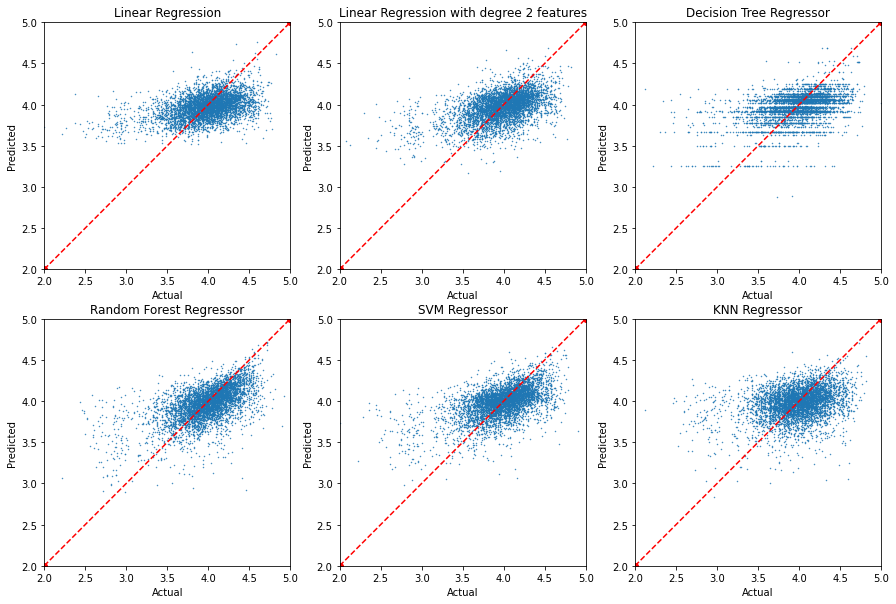

In [ ]:
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)

X = np.asarray(X).astype('float64')
Y = np.asarray(Y).astype('float64')

plt.clf()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

y_hats = np.zeros(y_test.shape)


X_train, X_test, y_train, y_test = train_test_split(X, Y)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
ax1.set_title('Linear Regression')
ax1.scatter(y_test, y_hat_test, s = 0.2)
ax1.plot((2, 5), (2, 5), 'ro--')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_xlim(2, 5)
ax1.set_ylim(2, 5)

trans = PolynomialFeatures(degree=2)
X_2 = trans.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_2, Y)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
ax2.set_title('Linear Regression with degree 2 features')
ax2.scatter(y_test, y_hat_test, s = 0.2)
ax2.plot((2, 5), (2, 5), 'ro--')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_xlim(2, 5)
ax2.set_ylim(2, 5)

X_train, X_test, y_train, y_test = train_test_split(X, Y)
clf = DecisionTreeRegressor(max_depth=7)
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
ax3.set_title('Decision Tree Regressor')
ax3.scatter(y_test, y_hat_test, s = 0.2)
ax3.plot((2, 5), (2, 5), 'ro--')
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')
ax3.set_xlim(2, 5)
ax3.set_ylim(2, 5)

X_train, X_test, y_train, y_test = train_test_split(X, Y)
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
ax4.set_title('Random Forest Regressor')
ax4.scatter(y_test, y_hat_test, s = 0.2)
ax4.plot((2, 5), (2, 5), 'ro--')
ax4.set_xlabel('Actual')
ax4.set_ylabel('Predicted')
ax4.set_xlim(2, 5)
ax4.set_ylim(2, 5)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, Y)
clf = SVR()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
ax5.set_title('SVM Regressor')
ax5.scatter(y_test, y_hat_test, s = 0.2)
ax5.plot((2, 5), (2, 5), 'ro--')
ax5.set_xlabel('Actual')
ax5.set_ylabel('Predicted')
ax5.set_xlim(2, 5)
ax5.set_ylim(2, 5)

X_train, X_test, y_train, y_test = train_test_split(X, Y)
clf = KNeighborsRegressor()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
ax6.set_title('KNN Regressor')
ax6.scatter(y_test, y_hat_test, s = 0.2)
ax6.plot((2, 5), (2, 5), 'ro--')
ax6.set_xlabel('Actual')
ax6.set_ylabel('Predicted')
ax6.set_xlim(2, 5)
ax6.set_ylim(2, 5)

fig.set_size_inches(15, 10)
fig.savefig('results.png')
fig.show()

In [ ]:
!pip install wandb -qq
import wandb
wandb.init(project="sklearn")

# Load data
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model, get predictions
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
y_pred = random_forest_reg.predict(X_test)

# Visualize all regression plots
wandb.sklearn.plot_regressor(lin_reg, X_train, X_test, y_train, y_test, 'Linear regression')
wandb.sklearn.plot_regressor(random_forest_reg, X_train, X_test, y_train, y_test, 'Random Forest regressor')


     |████████████████████████████████| 1.8MB 6.3MB/s 
     |████████████████████████████████| 133kB 18.9MB/s 
     |████████████████████████████████| 163kB 16.1MB/s 
     |████████████████████████████████| 102kB 8.1MB/s 
     |████████████████████████████████| 102kB 7.7MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: 
wandb: Plotting Linear regression.
wandb: Logged summary metrics.
wandb: Logged learning curve.
wandb: WARNING wandb uses only the first 10000 datapoints to create the plots.
wandb: Logged outlier candidates.
wandb: WARNING wandb uses only the first 10000 datapoints to create the plots.
wandb: WARNING wandb uses only the first 10000 datapoints to create the plots.
wandb: Logged residuals.
wandb: 
wandb: Plotting Random Forest regressor.
wandb: Logged summary metrics.
wandb: Logged learning curve.
wandb: WARNING wandb uses only the first 10000 datapoints to create the plots.
wandb: Logged outlier candidates.
wandb: WARNING wandb uses only the first 10000 datapoints to create the plots.
wandb: WARNING wandb uses only the first 10000 datapoints to create the plots.
wandb: Logged residuals.


In [ ]:
!ls ./drive/My\ Drive/ML\ Project/images | wc -l

In [ ]:

clf = KNeighborsRegressor()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test).reshape((y_hat_test.shape[0]))
ax6.set_title('KNN Regressor')
ax6.scatter(y_test, y_hat_test, s = 0.2)
ax6.plot((0, 5), (0, 5), 'ro--')
ax6.set_xlabel('Actual')
ax6.set_ylabel('Predicted')
ax6.set_xlim(0, 5)
ax6.set_ylim(0, 5)
y_hats += y_hat_test

# Classification
Splitting into intervals of
* 0.5
* 0.2
* 0.05
* 0.01
* 0.005

Gaussian Naive Bayes Classifier

In [ ]:
# Gaussian NB
# split ratings into buckets of size class_size and then performed naive bayes. Measured mean squared error between predicted and actual
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)


for class_size in [0.5, 0.2, 0.1, 0.05, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')

    kfold = KFold(n_splits=5)
    k_fold_mse = []
    k_fold_mae = []
    k_fold_training_mse = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_[train_index], Y[test_index]
        y_train_real = Y[train_index]
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test) * class_size
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

    print('class_size:', class_size, '5-fold crossval avg mse', round(sum(k_fold_mse)/len(k_fold_mse), 2), 'custom', round(sum(k_fold_mae)/len(k_fold_mae), 2))
    print('\t Training loss', round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2))

class_size: 0.5 5-fold crossval avg mse 1.69 custom 3.44
	 Training loss 1.67
class_size: 0.2 5-fold crossval avg mse 1.25 custom 2.68
	 Training loss 1.24
class_size: 0.1 5-fold crossval avg mse 1.49 custom 2.84
	 Training loss 1.48
class_size: 0.05 5-fold crossval avg mse 1.9 custom 3.47
	 Training loss 1.9
class_size: 0.005 5-fold crossval avg mse 1.14 custom 2.2
	 Training loss 1.13


Gaussian Naive Bayes Classifier with PCA

In [ ]:
# PCA + Gaussian NB
# split ratings into buckets of size class_size and then performed naive bayes. Measured mean squared error between predicted and actual
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)

Y = data_train.values[:,6]



for class_size in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')

    kfold = KFold(n_splits=5)
    k_fold_mse = []
    k_fold_mae = []
    k_fold_training_mse = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_[train_index], Y[test_index]
        y_train_real = Y[train_index]
        pca = PCA(0.95)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test) * class_size
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

    print('class_size:', class_size, '5-fold crossval avg mse', round(sum(k_fold_mse)/len(k_fold_mse), 2), 'custom', round(sum(k_fold_mae)/len(k_fold_mae), 2))
    print('\t Training loss', round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2))

class_size: 0.5 5-fold crossval avg mse 0.17 custom 1.13
	 Training loss 0.17
class_size: 0.2 5-fold crossval avg mse 0.14 custom 1.02
	 Training loss 0.14
class_size: 0.1 5-fold crossval avg mse 0.14 custom 1.0
	 Training loss 0.13
class_size: 0.05 5-fold crossval avg mse 0.15 custom 0.99
	 Training loss 0.14
class_size: 0.01 5-fold crossval avg mse 0.19 custom 1.02
	 Training loss 0.19
class_size: 0.005 5-fold crossval avg mse 0.19 custom 1.02
	 Training loss 0.19


Logistic Regression (SGD)

In [ ]:
# split ratings into buckets of size class_size and then performed naive bayes. Measured mean squared error between predicted and actual
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression, SGDClassifier
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)

Y = data_train.values[:,6]
for class_size in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')

    kfold = KFold(n_splits=5)
    k_fold_mse = []
    k_fold_mae = []
    k_fold_training_mse = []
    k_fold_f1Score = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_[train_index], Y[test_index]
        y_train_real = Y[train_index]
        #clf = LogisticRegression(max_iter=10000)
        clf = SGDClassifier()
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test) * class_size
        #print(y_hat[:10], y_test[:10])
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

    print('class_size:', class_size, '5-fold crossval avg mse', round(sum(k_fold_mse)/len(k_fold_mse), 2), 'custom', round(sum(k_fold_mae)/len(k_fold_mae), 2))
    print('\t Training loss', round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2))

Logistic Regression
class_size: 0.5 5-fold crossval avg mse 0.27 custom 1.38
	 Training loss 0.27
class_size: 0.2 5-fold crossval avg mse 0.25 custom 1.29
	 Training loss 0.25
class_size: 0.1 5-fold crossval avg mse 0.17 custom 0.83
	 Training loss 0.17
class_size: 0.05 5-fold crossval avg mse 0.18 custom 1.04
	 Training loss 0.18
class_size: 0.01 5-fold crossval avg mse 0.21 custom 1.0
	 Training loss 0.22
class_size: 0.005 5-fold crossval avg mse 0.21 custom 1.08
	 Training loss 0.21


In [ ]:
# split ratings into buckets of size class_size and then performed naive bayes. Measured mean squared error between predicted and actual
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression, SGDClassifier
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)

Y = data_train.values[:,6]
for class_size in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')

    kfold = KFold(n_splits=5)
    k_fold_mse = []
    k_fold_mae = []
    k_fold_training_mse = []
    k_fold_f1Score = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_[train_index], Y[test_index]
        y_train_real = Y[train_index]
        pca = PCA(1)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)
        # clf = LogisticRegression(max_iter=10000)
        clf = SGDClassifier(max_iter=10000000)
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test) * class_size
        #print(y_hat[:10], y_test[:10])
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

    print('class_size:', class_size, '5-fold crossval avg mse', round(sum(k_fold_mse)/len(k_fold_mse), 2), 'custom', round(sum(k_fold_mae)/len(k_fold_mae), 2))
    print('\t Training loss', round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2))

Logistic Regression
class_size: 0.5 5-fold crossval avg mse 0.45 custom 1.8
	 Training loss 0.46
class_size: 0.2 5-fold crossval avg mse 0.44 custom 1.41
	 Training loss 0.44
class_size: 0.1 5-fold crossval avg mse 0.13 custom 0.92
	 Training loss 0.13
class_size: 0.05 5-fold crossval avg mse 3.76 custom 7.11
	 Training loss 3.76
class_size: 0.01 5-fold crossval avg mse 3.57 custom 6.53
	 Training loss 3.56
class_size: 0.005 5-fold crossval avg mse 2.24 custom 4.3
	 Training loss 2.25


Decision Tree Classifier

In [ ]:
# split ratings into buckets of size class_size and then performed naive bayes. Measured mean squared error between predicted and actual
print("Decision Trees Classifier")
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)


Y = data_train.values[:,6]

for class_size in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')

    kfold = KFold(n_splits=5)
    k_fold_mse = []
    k_fold_mae = []
    k_fold_training_mse = []
    k_fold_f1Score = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_[train_index], Y[test_index]
        y_train_real = Y[train_index]
        clf = DecisionTreeClassifier(max_depth = 10)
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test) * class_size
        #print(y_hat[:10], y_test[:10])
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

    print('class_size:', class_size, '5-fold crossval avg mse', round(sum(k_fold_mse)/len(k_fold_mse), 2), 'custom', round(sum(k_fold_mae)/len(k_fold_mae), 2))
    print('\t Training loss', round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2))

Decision Trees Classifier
class_size: 0.5 5-fold crossval avg mse 0.2 custom 1.02
	 Training loss 0.17
class_size: 0.2 5-fold crossval avg mse 0.12 custom 0.77
	 Training loss 0.1
class_size: 0.1 5-fold crossval avg mse 0.11 custom 0.72
	 Training loss 0.1
class_size: 0.05 5-fold crossval avg mse 0.11 custom 0.67
	 Training loss 0.1
class_size: 0.01 5-fold crossval avg mse 0.12 custom 0.72
	 Training loss 0.11
class_size: 0.005 5-fold crossval avg mse 0.12 custom 0.74
	 Training loss 0.11


Random Forest Classifier

In [ ]:
# split ratings into buckets of size class_size and then performed naive bayes. Measured mean squared error between predicted and actual
print("Random Forest Classifier")
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)


Y = data_train.values[:,6]

for class_size in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')

    kfold = KFold(n_splits=5)
    k_fold_mse = []
    k_fold_mae = []
    k_fold_training_mse = []
    k_fold_f1Score = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_[train_index], Y[test_index]
        y_train_real = Y[train_index]
        clf = RandomForestClassifier(min_samples_leaf=10)
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test) * class_size
        #print(y_hat[:10], y_test[:10])
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

    print('class_size:', class_size, '5-fold crossval avg mse', round(sum(k_fold_mse)/len(k_fold_mse), 2), 'custom', round(sum(k_fold_mae)/len(k_fold_mae), 2))
    print('\t Training loss', round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2))

Random Forest Classifier
class_size: 0.5 5-fold crossval avg mse 0.2 custom 1.09
	 Training loss 0.19
class_size: 0.2 5-fold crossval avg mse 0.12 custom 0.86
	 Training loss 0.11
class_size: 0.1 5-fold crossval avg mse 0.1 custom 0.81
	 Training loss 0.09
class_size: 0.05 5-fold crossval avg mse 0.1 custom 0.76
	 Training loss 0.09
class_size: 0.01 5-fold crossval avg mse 0.1 custom 0.71
	 Training loss 0.05
class_size: 0.005 5-fold crossval avg mse 0.1 custom 0.73
	 Training loss 0.05


K nearest neighbors classifier

In [ ]:
# split ratings into buckets of size class_size and then performed K nearest neighbors. Measured mean squared error and mean absolute error between predicted and actual
print("K Nearest Neighbors Classifier")
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)
Y = data_train.values[:,6]

result = {}
for i in range(2, 10):
    result[i] = {}

for class_size in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')
    for neighbors in range(2, 10):
        kfold = KFold(n_splits=5)
        k_fold_mse = []
        k_fold_mae = []
        k_fold_training_mse = []
        k_fold_f1Score = []
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y_[train_index], Y[test_index]
            y_train_real = Y[train_index]
            knn = KNeighborsClassifier(n_neighbors = neighbors)
            knn.fit(X_train,y_train)
            y_hat = knn.predict(X_test) * class_size
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

        result[neighbors][class_size] = (round(sum(k_fold_mse)/len(k_fold_mse), 2), round(sum(k_fold_mae)/len(k_fold_mae), 2), round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2) )
print(result)


K Nearest Neighbors Classifier
{2: {0.5: (0.21, 0.95, 157052.04), 0.2: (0.17, 0.77, 24377.6), 0.1: (0.18, 0.76, 5787.94), 0.05: (0.18, 0.75, 1299.7), 0.01: (0.19, 0.74, 16.28), 0.005: (0.19, 0.74, 0.05)}, 3: {0.5: (0.26, 1.12, 157052.04), 0.2: (0.19, 0.83, 24377.6), 0.1: (0.21, 0.79, 5787.94), 0.05: (0.22, 0.78, 1299.7), 0.01: (0.23, 0.77, 16.28), 0.005: (0.23, 0.77, 0.05)}, 4: {0.5: (0.22, 1.09, 157052.04), 0.2: (0.19, 0.9, 24377.6), 0.1: (0.22, 0.84, 5787.94), 0.05: (0.24, 0.84, 1299.7), 0.01: (0.26, 0.83, 16.28), 0.005: (0.26, 0.83, 0.05)}, 5: {0.5: (0.23, 1.08, 157052.04), 0.2: (0.18, 0.9, 24377.6), 0.1: (0.21, 0.86, 5787.94), 0.05: (0.25, 0.88, 1299.7), 0.01: (0.3, 0.91, 16.28), 0.005: (0.3, 0.91, 0.05)}, 6: {0.5: (0.22, 1.11, 157052.04), 0.2: (0.16, 0.88, 24377.6), 0.1: (0.19, 0.86, 5787.94), 0.05: (0.25, 0.9, 1299.7), 0.01: (0.33, 0.94, 16.28), 0.005: (0.33, 0.94, 0.05)}, 7: {0.5: (0.23, 1.1, 157052.04), 0.2: (0.15, 0.85, 24377.6), 0.1: (0.17, 0.84, 5787.94), 0.05: (0.24, 0.9, 1

SVM Classifier

In [ ]:
from sklearn.svm import SVC


# split ratings into buckets of size class_size and then performed naive bayes. Measured mean squared error between predicted and actual
print("SVM Classifier")
X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

# take log of author followers
X[:, -1] = np.log(X[:, -1] + 1)

Y = data_train.values[:,6]
for class_size in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]:
    Y_ = np.array(Y, dtype='float64')
    i = class_size
    classes = [i * class_size for i in range(ceil(5/class_size) + 1)]
    for ind in range(Y.shape[0]):
        for i in range(len(classes)):
            if Y_[ind] <= classes[i]:
                Y_[ind] = i
                break
    Y_ = np.array(Y_, dtype='float64')

    kfold = KFold(n_splits=5)
    k_fold_mse = []
    k_fold_mae = []
    k_fold_training_mse = []
    k_fold_f1Score = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_[train_index], Y[test_index]
        y_train_real = Y[train_index]
        clf = SVC()
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test) * class_size
        k_fold_mse.append(mean_squared_error(y_hat, y_test))
        k_fold_mae.append(custom_mean_squared_error(y_hat, y_test))
        k_fold_training_mse.append(mean_squared_error(clf.predict(X_train) * class_size, y_train_real))

    print('class_size:', class_size, '5-fold crossval avg mse', round(sum(k_fold_mse)/len(k_fold_mse), 2), 'custom', round(sum(k_fold_mae)/len(k_fold_mae), 2))
    print('\t Training loss', round(sum(k_fold_training_mse)/len(k_fold_training_mse), 2))

SVM Classifier
class_size: 0.5 5-fold crossval avg mse 0.4 custom 1.89
	 Training loss 0.4
class_size: 0.2 5-fold crossval avg mse 0.17 custom 1.19
	 Training loss 0.17
class_size: 0.1 5-fold crossval avg mse 0.13 custom 1.03
	 Training loss 0.13
class_size: 0.05 5-fold crossval avg mse 0.13 custom 1.02
	 Training loss 0.13
class_size: 0.01 5-fold crossval avg mse 0.12 custom 0.95
	 Training loss 0.12
class_size: 0.005 5-fold crossval avg mse 0.12 custom 0.95
	 Training loss 0.12


XGBoost

In [6]:
import xgboost as xg 

X = (data_train.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_train.values[:,6]
# Y = data.values[:,-5].astype('float64') ## Rating count
# Y = np.log(Y)

# take log of author followers
X[:, 3] = np.log(X[:, 3] + 1)

kfold = KFold(n_splits=5)
train_avg = 0
test_avg = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    xgb_r = xg.XGBRegressor()
    xgb_r.fit(X_train, y_train)
    y_hat = xgb_r.predict(X_train)
    train_avg += mean_squared_error(y_hat, y_train)
    y_hat = xgb_r.predict(X_test)
    test_avg += mean_squared_error(y_hat, y_test)
    
print('Training:', train_avg/5)
print('Testing:', test_avg/5)


model = xg.XGBRegressor()
model.fit(X, Y)
pickle.dump(model, open('./drive/My Drive/ML Project/weights/XGBoost.sav', 'wb'))
model = pickle.load(open('./drive/My Drive/ML Project/weights/XGBoost.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))

[10:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training: 0.08136402647320758
Testing: 0.08556405621515346
[10:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.08195458287265839


#Testing

## Random Forest

In [5]:
X = (data_test.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_test.values[:,6]

X[:, 3] = np.log(X[:, 3] + 1)
model = pickle.load(open('./drive/My Drive/ML Project/weights/RandomForestRegressor.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))
print(custom_mean_squared_error(y_hat, Y))

0.07514307396106248
0.5361908724421078


## XGBoost

In [7]:
X = (data_test.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')
Y = data_test.values[:,6]

X[:, 3] = np.log(X[:, 3] + 1)
model = pickle.load(open('./drive/My Drive/ML Project/weights/XGBoost.sav', 'rb'))
y_hat = model.predict(X)
print(mean_squared_error(y_hat, Y))
print(custom_mean_squared_error(y_hat, Y))

[10:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.08310209209012127
0.6569402288234015


In [10]:
print(data_train.values.shape)

(16206, 35)
